In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
profiles = pd.read_csv("profiles.csv")
print(profiles.shape)
print(profiles.columns)
print(profiles.info())

(59946, 31)
Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  objec

In [4]:
profiles['religionCleaned'] = profiles.religion.str.split().str.get(0)
profiles['signsCleaned'] = profiles.sign.str.split().str.get(0)
profiles

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,orientation,pets,religion,sex,sign,smokes,speaks,status,religionCleaned,signsCleaned
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,agnosticism,gemini
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,agnosticism,cancer
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,NaN,pisces
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,NaN,pisces
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single,NaN,aquarius
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,NaN,NaN,socially,never,graduated from college/university,"vibrant, expressive, caring optimist. i love b...",the happiest times have been when life came to...,i make an outstanding osso bucco. i am also ve...,"i am told that people notice my smile, eyes an...",...,straight,has dogs,catholicism but not too serious about it,f,cancer and it&rsquo;s fun to think about,no,english,single,catholicism,cancer
59942,24,fit,mostly anything,often,sometimes,working on college/university,i'm nick.<br />\ni never know what to write ab...,currently finishing school for film production...,"<a class=""ilink"" href=""/interests?i=filmmaking...","dude, i don't know.",...,straight,likes dogs and likes cats,agnosticism,m,leo but it doesn&rsquo;t matter,no,english (fluently),single,agnosticism,leo
59943,42,average,mostly anything,not at all,never,graduated from masters program,"hello! i enjoy traveling, watching movies, and...","i'm a civil engineer, who enjoys helping the c...",- looking at things objectively<br />\n- getti...,i'm quiet until i get used to the environment ...,...,straight,NaN,christianity but not too serious about it,m,sagittarius but it doesn&rsquo;t matter,no,english (fluently),single,christianity,sagittarius
59944,27,athletic,mostly anything,socially,often,working on college/university,"""all i have in this world are my balls and my ...","following my dreams...<br />\n""you got a dream...",listening,it used to be the hair until i mowed it off bu...,...,straight,likes dogs and likes cats,agnosticism but not too serious about it,m,leo and it&rsquo;s fun to think about,trying to quit,"english (fluently), spanish (poorly), chinese ...",single,agnosticism,leo


In [5]:
cols = ['body_type', 'diet', 'job', 'pets', 'orientation', 'religionCleaned', 'sex', 'signsCleaned']
df = profiles[cols].dropna()
df

,body_type,diet,job,pets,orientation,religionCleaned,sex,signsCleaned
0,a little extra,strictly anything,transportation,likes dogs and likes cats,straight,agnosticism,m,gemini
1,average,mostly other,hospitality / travel,likes dogs and likes cats,straight,agnosticism,m,cancer
5,average,mostly anything,computer / hardware / software,likes cats,straight,atheism,m,taurus
7,average,mostly anything,artistic / musical / writer,likes dogs and likes cats,straight,christianity,f,sagittarius
9,athletic,mostly anything,student,likes dogs and likes cats,straight,atheism,m,cancer
...,...,...,...,...,...,...,...,...
59929,average,strictly vegetarian,artistic / musical / writer,has dogs and likes cats,straight,atheism,m,pisces
59930,curvy,anything,political / government,likes dogs and likes cats,gay,other,m,aries
59934,average,anything,other,has dogs and has cats,straight,judaism,f,pisces
59942,fit,mostly anything,entertainment / media,likes dogs and likes cats,straight,agnosticism,m,leo


In [6]:
X = df.drop(columns='signsCleaned')
X = pd.get_dummies(data=X, columns=X.columns)
y = df['signsCleaned']
print(y.value_counts())

signsCleaned
leo            1516
gemini         1496
cancer         1457
virgo          1451
taurus         1390
scorpio        1356
libra          1354
pisces         1334
aries          1328
sagittarius    1312
aquarius       1262
capricorn      1197
Name: count, dtype: int64


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [31]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_predictions =  lr.predict(X_train)

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy_test = accuracy_score(y_test, y_pred)
#print(accuracy_train)
print(accuracy_test)

print(classification_report(lr_predictions,y_train))

0.08650729335494327
              precision    recall  f1-score   support

    aquarius       0.05      0.13      0.07       319
       aries       0.08      0.11      0.09       684
      cancer       0.22      0.13      0.16      1742
   capricorn       0.06      0.13      0.08       422
      gemini       0.17      0.13      0.14      1366
         leo       0.16      0.12      0.14      1380
       libra       0.11      0.14      0.12       748
      pisces       0.16      0.12      0.13      1268
 sagittarius       0.09      0.14      0.11       609
     scorpio       0.04      0.12      0.06       321
      taurus       0.10      0.12      0.11       871
       virgo       0.22      0.13      0.16      1787

    accuracy                           0.12     11517
   macro avg       0.12      0.13      0.12     11517
weighted avg       0.15      0.12      0.13     11517



In [29]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
model_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [30]:
print(classification_report(model_predictions, y_train))
print(classification_report(test_predictions, y_test))

              precision    recall  f1-score   support

    aquarius       0.66      0.27      0.38      2228
       aries       0.53      0.27      0.36      1786
      cancer       0.42      0.30      0.35      1432
   capricorn       0.35      0.33      0.34       899
      gemini       0.32      0.36      0.34       898
         leo       0.28      0.39      0.33       753
       libra       0.25      0.38      0.30       629
      pisces       0.29      0.40      0.34       678
 sagittarius       0.21      0.40      0.28       498
     scorpio       0.21      0.43      0.28       444
      taurus       0.26      0.42      0.32       614
       virgo       0.24      0.38      0.30       658

    accuracy                           0.33     11517
   macro avg       0.34      0.36      0.33     11517
weighted avg       0.41      0.33      0.34     11517

              precision    recall  f1-score   support

    aquarius       0.16      0.06      0.09       959
       aries       0.16 

In [13]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_predictions = tree.predict(X_train)
print(classification_report(tree_predictions, y_train))

              precision    recall  f1-score   support

    aquarius       0.94      0.65      0.77      1289
       aries       0.90      0.68      0.77      1214
      cancer       0.87      0.71      0.78      1261
   capricorn       0.82      0.75      0.78       937
      gemini       0.81      0.78      0.79      1062
         leo       0.79      0.81      0.80      1021
       libra       0.78      0.80      0.79       933
      pisces       0.74      0.84      0.79       827
 sagittarius       0.70      0.86      0.77       753
     scorpio       0.69      0.90      0.78       707
      taurus       0.69      0.91      0.79       754
       virgo       0.68      0.92      0.78       759

    accuracy                           0.78     11517
   macro avg       0.78      0.80      0.78     11517
weighted avg       0.80      0.78      0.78     11517



In [14]:
from sklearn.metrics import confusion_matrix
tree_cm = confusion_matrix(y_train, tree_predictions)
tree_labels = tree.classes_
print(tree_labels)

['aquarius' 'aries' 'cancer' 'capricorn' 'gemini' 'leo' 'libra' 'pisces'
 'sagittarius' 'scorpio' 'taurus' 'virgo']


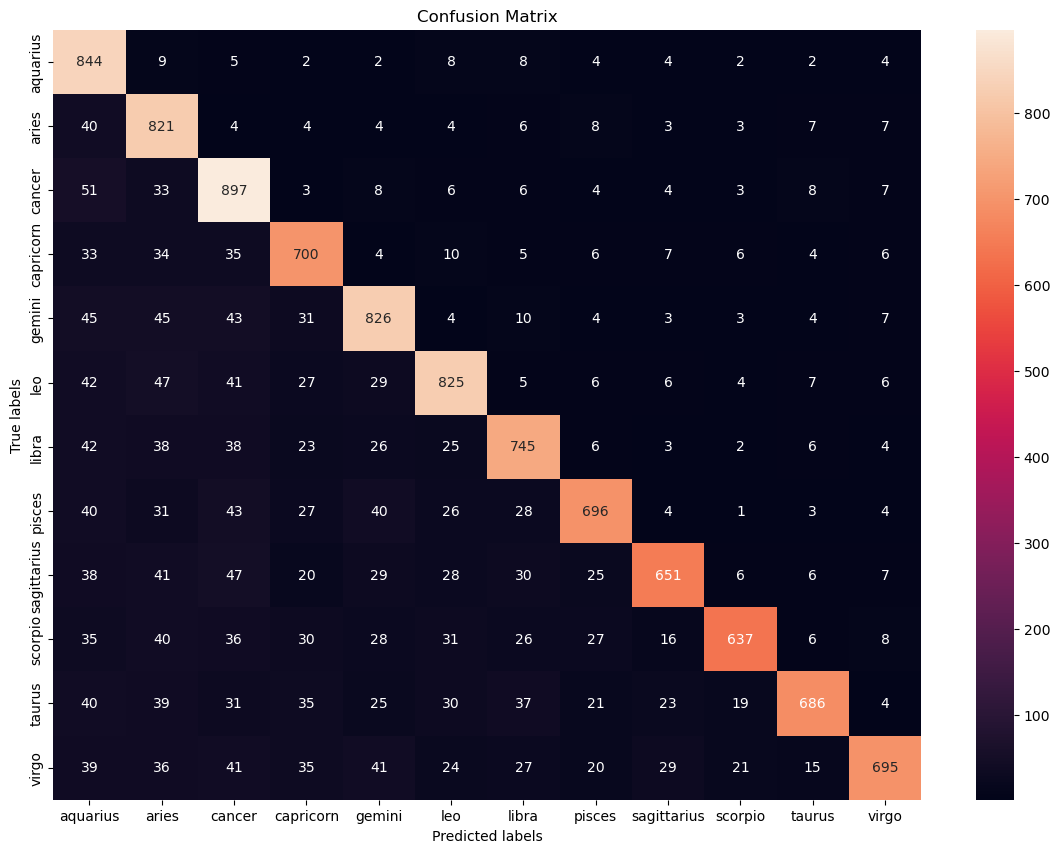

In [16]:
plt.figure(figsize=(14, 10))

ax = plt.subplot()
sns.heatmap(tree_cm, xticklabels=tree_labels, yticklabels=tree_labels, annot=True, ax=ax, fmt='d')

plt.title("Confusion Matrix")
plt.ylabel("True labels")
plt.xlabel("Predicted labels")

plt.show()

In [20]:
print(tree.get_depth())

57


In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(tree, X_train, y_train, cv=k_fold, scoring='accuracy')

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.08420139 0.08550347 0.08640903 0.09422492 0.09639601]
Baseline: 8.93% (0.50%)


In [27]:
#  The decision tree classifier model performs well on the training data, but poorly on test data (~9%).  This suggests the overfitting of the model to the data.
#  To correct this, limit tree depth.

tree20 = DecisionTreeClassifier(max_depth=20)
tree20.fit(X_train, y_train)
tree20_predictions = tree20.predict(X_train)
print(classification_report(y_train, tree20_predictions))

tree20_test_predictions = tree20.predict(X_test)
print(classification_report(y_test, tree20_test_predictions))

              precision    recall  f1-score   support

    aquarius       0.64      0.32      0.43       894
       aries       0.66      0.30      0.41       911
      cancer       0.33      0.48      0.39      1030
   capricorn       0.48      0.33      0.39       850
      gemini       0.37      0.30      0.33      1025
         leo       0.31      0.38      0.34      1045
       libra       0.54      0.31      0.39       958
      pisces       0.44      0.31      0.36       943
 sagittarius       0.64      0.24      0.35       928
     scorpio       0.38      0.29      0.33       920
      taurus       0.48      0.31      0.38       990
       virgo       0.17      0.59      0.26      1023

    accuracy                           0.35     11517
   macro avg       0.45      0.35      0.36     11517
weighted avg       0.45      0.35      0.36     11517

              precision    recall  f1-score   support

    aquarius       0.09      0.04      0.06       368
       aries       0.10 

The model tuned to have a max depth of 20 appears to appeal to more generalised data, as the accuracy score of the training data has decreased.  I was hoping to see an increase in the accuracy score for the test data, but there was no significant improvement.